In [1]:
import numpy as np
from sklearn.datasets import load_svmlight_file
import time
from scipy import special
from scipy import misc
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model

import multiclass
import oracles
import utils
import optimization

In [111]:
data = load_svmlight_file('real-sim')

In [112]:
X, y = data[0], data[1]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Эксперимент 1

In [114]:
%%time
gd_clf = optimization.GDClassifier('binary_logistic', max_iter=10000, l2_coef=1e-5, tolerance=1e-5,
                                   step_alpha=1, step_beta=0, fit_intercept=True)
gd_history = gd_clf.fit(X_train, y_train, trace=True, X_test=X_test, y_test=y_test)

CPU times: user 7min 16s, sys: 36.3 ms, total: 7min 16s
Wall time: 7min 16s


In [115]:
%%time
sgd_clf = optimization.SGDClassifier('binary_logistic', max_iter=10000, l2_coef=1e-5, tolerance=1e-5,
                                     step_alpha=1, step_beta=0, fit_intercept=True)
sgd_history_1 = sgd_clf.fit(X_train, y_train, trace=True, log_freq=0.005, X_test=X_test, y_test=y_test)

CPU times: user 27.4 s, sys: 13.3 ms, total: 27.4 s
Wall time: 27.4 s


In [116]:
%%time
sgd_clf = optimization.SGDClassifier('binary_logistic', max_iter=10000, l2_coef=1e-5, tolerance=1e-5,
                                     step_alpha=1, step_beta=0, fit_intercept=True)
sgd_history_2 = sgd_clf.fit(X_train, y_train, w_0 = np.random.normal(-0.5, 0.5, X.shape[1]),
                            trace=True, log_freq=0.005, X_test=X_test, y_test=y_test)

CPU times: user 27.2 s, sys: 3.31 ms, total: 27.2 s
Wall time: 27.2 s


In [117]:
%%time
sgd_clf = optimization.SGDClassifier('binary_logistic', max_iter=10000, l2_coef=1e-5, tolerance=1e-5,
                                     step_alpha=1, step_beta=0, fit_intercept=True)
sgd_history_3 = sgd_clf.fit(X_train, y_train, w_0 = np.random.normal(0.5, 0.5, X.shape[1]),
                            trace=True, log_freq=0.005, X_test=X_test, y_test=y_test)

CPU times: user 27.2 s, sys: 3.29 ms, total: 27.2 s
Wall time: 27.2 s


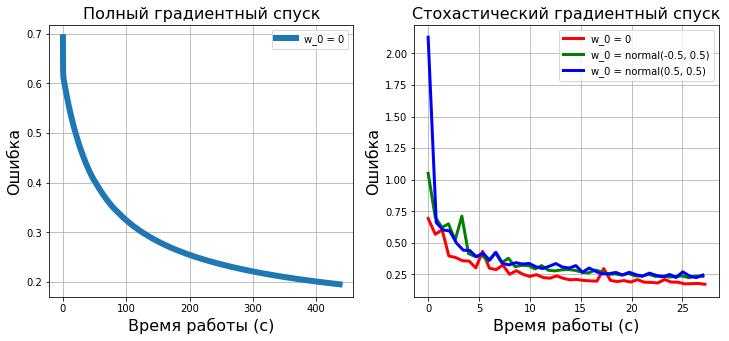

In [118]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.set_title('Полный градиентный спуск', fontsize=16)
ax1.set_xlabel('Время работы (с)', fontsize=16)
ax1.set_ylabel('Ошибка', fontsize=16)
ax1.plot(gd_history['time'], gd_history['func'],
         label='w_0 = {}'.format(0), linewidth=6)
ax1.grid()
ax1.legend()

ax2.set_title('Стохастический градиентный спуск', fontsize=16)
ax2.set_xlabel('Время работы (с)', fontsize=16)
ax2.set_ylabel('Ошибка', fontsize=16)
ax2.plot(sgd_history_1['time'], sgd_history_1['func'], color='r',
         label='w_0 = 0', linewidth=3)
ax2.plot(sgd_history_2['time'], sgd_history_2['func'], color='g',
         label='w_0 = normal(-0.5, 0.5)', linewidth=3)
ax2.plot(sgd_history_3['time'], sgd_history_3['func'], color='b',
         label='w_0 = normal(0.5, 0.5)', linewidth=3)
ax2.grid()
ax2.legend()
plt.savefig('LinearMethodsReport/exp1_1.pdf')

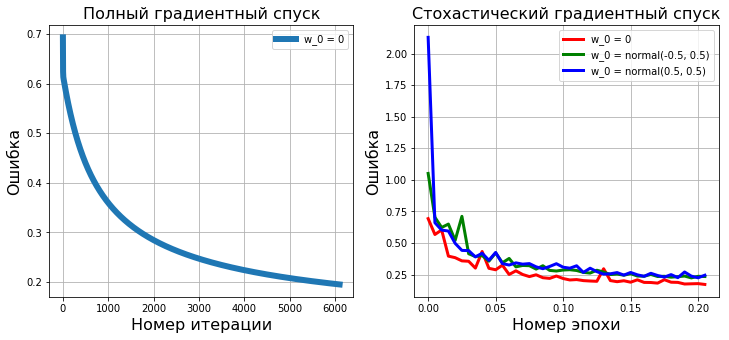

In [119]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.set_title('Полный градиентный спуск', fontsize=16)
ax1.set_xlabel('Номер итерации', fontsize=16)
ax1.set_ylabel('Ошибка', fontsize=16)
ax1.plot(np.arange(len(gd_history['time'])), gd_history['func'],
         label='w_0 = {}'.format(0), linewidth=6)
ax1.grid()
ax1.legend()

ax2.set_title('Стохастический градиентный спуск', fontsize=16)
ax2.set_xlabel('Номер эпохи', fontsize=16)
ax2.set_ylabel('Ошибка', fontsize=16)
ax2.plot(sgd_history_1['epoch_num'], sgd_history_1['func'], color='r',
         label='w_0 = 0', linewidth=3)
ax2.plot(sgd_history_2['epoch_num'], sgd_history_2['func'], color='g',
         label='w_0 = normal(-0.5, 0.5)', linewidth=3)
ax2.plot(sgd_history_3['epoch_num'], sgd_history_3['func'], color='b',
         label='w_0 = normal(0.5, 0.5)', linewidth=3)
ax2.grid()
ax2.legend()
plt.savefig('LinearMethodsReport/exp1_2.pdf')

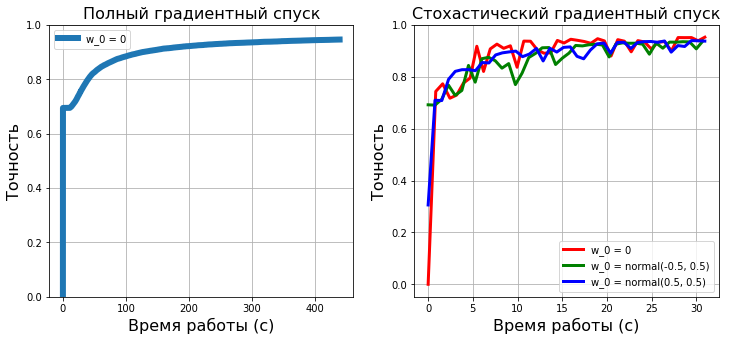

In [55]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.set_title('Полный градиентный спуск', fontsize=16)
ax1.set_xlabel('Время работы (с)', fontsize=16)
ax1.set_ylabel('Точность', fontsize=16)
ax1.plot(gd_history['time'], gd_history['accuracy'],
         label='w_0 = {}'.format(0), linewidth=6)
ax1.set_ylim([0, 1])
ax1.grid()
ax1.legend()

ax2.set_title('Стохастический градиентный спуск', fontsize=16)
ax2.set_xlabel('Время работы (с)', fontsize=16)
ax2.set_ylabel('Точность', fontsize=16)
ax2.plot(sgd_history_1['time'], sgd_history_1['accuracy'], color='r',
         label='w_0 = 0', linewidth=3)
ax2.plot(sgd_history_2['time'], sgd_history_2['accuracy'], color='g',
         label='w_0 = normal(-0.5, 0.5)', linewidth=3)
ax2.plot(sgd_history_3['time'], sgd_history_3['accuracy'], color='b',
         label='w_0 = normal(0.5, 0.5)', linewidth=3)
ax2.grid()
ax2.legend()
plt.savefig('LinearMethodsReport/exp1_3.pdf')

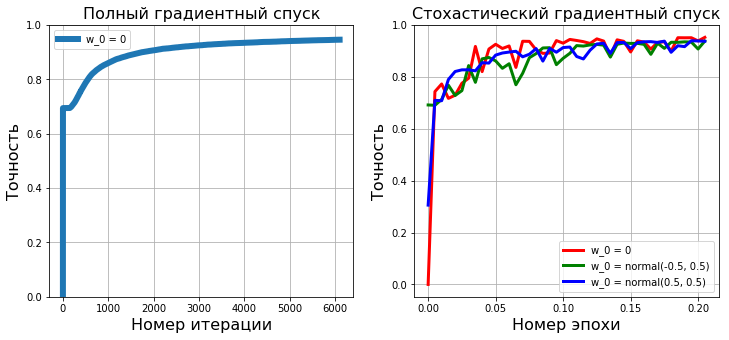

In [56]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.set_title('Полный градиентный спуск', fontsize=16)
ax1.set_xlabel('Номер итерации', fontsize=16)
ax1.set_ylabel('Точность', fontsize=16)
ax1.plot(np.arange(len(gd_history['time'])), gd_history['accuracy'],
         label='w_0 = {}'.format(0), linewidth=6)
ax1.set_ylim([0, 1])
ax1.grid()
ax1.legend()

ax2.set_title('Стохастический градиентный спуск', fontsize=16)
ax2.set_xlabel('Номер эпохи', fontsize=16)
ax2.set_ylabel('Точность', fontsize=16)
ax2.plot(sgd_history_1['epoch_num'], sgd_history_1['accuracy'], color='r',
         label='w_0 = 0', linewidth=3)
ax2.plot(sgd_history_2['epoch_num'], sgd_history_2['accuracy'], color='g',
         label='w_0 = normal(-0.5, 0.5)', linewidth=3)
ax2.plot(sgd_history_3['epoch_num'], sgd_history_3['accuracy'], color='b',
         label='w_0 = normal(0.5, 0.5)', linewidth=3)
ax2.grid()
ax2.legend()
plt.savefig('LinearMethodsReport/exp1_4.pdf')

### Эксперимент 2

In [131]:
step_alpha = [0.1, 1, 100, 1000]
gd_history = []
sgd_history = []

In [132]:
for step in step_alpha:
    gd_clf = optimization.GDClassifier('binary_logistic', max_iter=10000, l2_coef=1e-5, tolerance=1e-5,
                                       step_alpha=step, step_beta=0, fit_intercept=True)
    gd_history.append(gd_clf.fit(X_train, y_train, trace=True, X_test=X_test, y_test=y_test))
    sgd_clf = optimization.SGDClassifier('binary_logistic', max_iter=10000, l2_coef=1e-5, tolerance=1e-5,
                                         step_alpha=step, step_beta=0, fit_intercept=True)
    sgd_history.append(sgd_clf.fit(X_train, y_train, trace=True, log_freq=0.005, X_test=X_test, y_test=y_test))

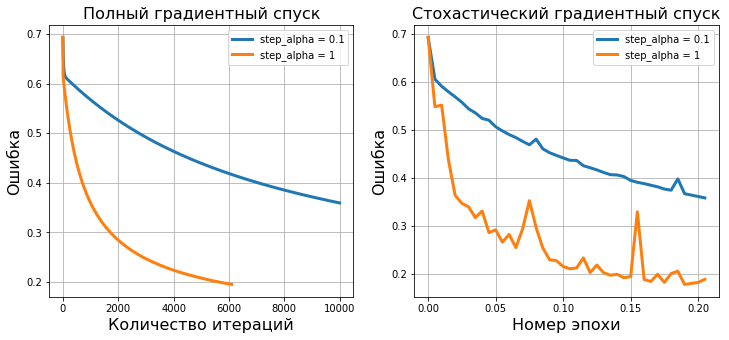

In [116]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.set_title('Полный градиентный спуск', fontsize=16)
ax1.plot(np.arange(len(gd_history[0]['time'])), gd_history[0]['func'],
            label='step_alpha = {}'.format(step_alpha[0]), linewidth=3)
ax1.plot(np.arange(len(gd_history[1]['time'])), gd_history[1]['func'],
            label='step_alpha = {}'.format(step_alpha[1]), linewidth=3)
ax1.set_xlabel('Количество итераций', fontsize=16)
ax1.set_ylabel('Ошибка', fontsize=16)
ax1.legend()
ax1.grid()

ax2.set_title('Стохастический градиентный спуск', fontsize=16)
for i in range(len(step_alpha) - 2):
    ax2.plot(sgd_history[i]['epoch_num'], sgd_history[i]['func'],
             label='step_alpha = {}'.format(step_alpha[i]), linewidth=3)
ax2.set_xlabel('Номер эпохи', fontsize=16)
ax2.set_ylabel('Ошибка', fontsize=16)
ax2.legend()
ax2.grid()

plt.savefig('LinearMethodsReport/exp2_1.pdf')

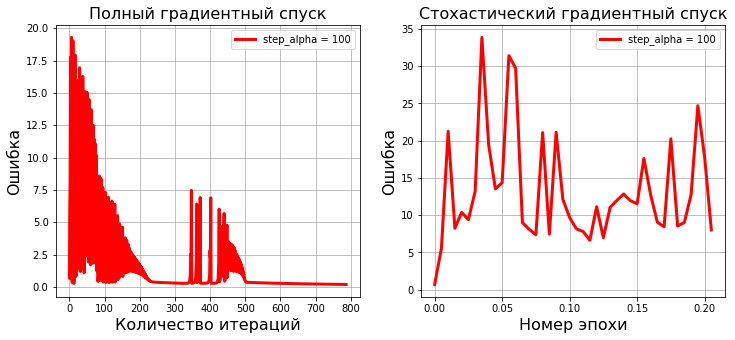

In [121]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.set_title('Полный градиентный спуск', fontsize=16)
ax1.plot(np.arange(len(gd_history[2]['time'])), gd_history[2]['func'],
         label='step_alpha = {}'.format(step_alpha[2]), linewidth=3, color='r')
#ax1.plot(np.arange(len(gd_history[3]['time'])), gd_history[3]['func'],
#         label='step_alpha = {}'.format(step_alpha[1]), linewidth=3)
ax1.set_xlabel('Количество итераций', fontsize=16)
ax1.set_ylabel('Ошибка', fontsize=16)
ax1.legend()
ax1.grid()

ax2.set_title('Стохастический градиентный спуск', fontsize=16)
ax2.plot(sgd_history[2]['epoch_num'], sgd_history[2]['func'],
         label='step_alpha = {}'.format(step_alpha[2]), linewidth=3, color='r')
ax2.set_xlabel('Номер эпохи', fontsize=16)
ax2.set_ylabel('Ошибка', fontsize=16)
ax2.legend()
ax2.grid()

plt.savefig('LinearMethodsReport/exp2_2.pdf')

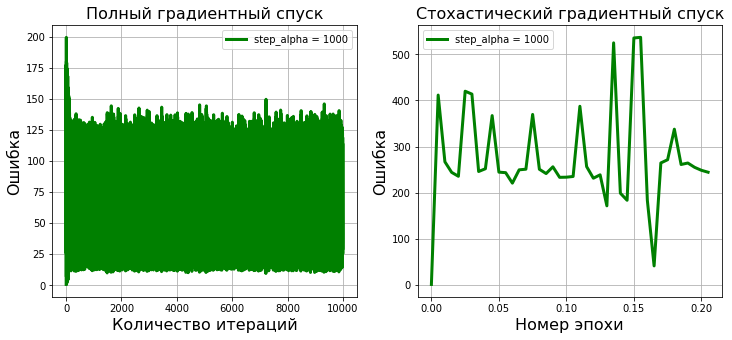

In [123]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.set_title('Полный градиентный спуск', fontsize=16)
ax1.plot(np.arange(len(gd_history[3]['time'])), gd_history[3]['func'],
         label='step_alpha = {}'.format(step_alpha[3]), linewidth=3, color='g')
#ax1.plot(np.arange(len(gd_history[3]['time'])), gd_history[3]['func'],
#         label='step_alpha = {}'.format(step_alpha[1]), linewidth=3)
ax1.set_xlabel('Количество итераций', fontsize=16)
ax1.set_ylabel('Ошибка', fontsize=16)
ax1.legend()
ax1.grid()

ax2.set_title('Стохастический градиентный спуск', fontsize=16)
ax2.plot(sgd_history[3]['epoch_num'], sgd_history[3]['func'],
         label='step_alpha = {}'.format(step_alpha[3]), linewidth=3, color='g')
ax2.set_xlabel('Номер эпохи', fontsize=16)
ax2.set_ylabel('Ошибка', fontsize=16)
ax2.legend()
ax2.grid()

plt.savefig('LinearMethodsReport/exp2_3.pdf')

In [133]:
for gd in gd_history:
    print(gd['accuracy'][-1])
print('\n')

for sgd in sgd_history:
    print(sgd['accuracy'][-1])

0.860363758277
0.945897242478
0.965090939569
0.694325706144


0.81510351186
0.950339451848
0.560263179951
0.713728941413


In [134]:
for gd in gd_history:
    print(gd['func'][-1])
print('\n')

for sgd in sgd_history:
    print(sgd['func'][-1])

0.359502851432
0.19522584855
0.197697799379
113.082518278


0.366399777217
0.17155199432
15.5268443204
143.240895557


### step_beta

In [139]:
step_alpha = [0.1, 1, 100]
step_beta = [0.1, 0.5, 1, 2, 5, 10, 100]
gd_history = {0.1:[], 1:[], 100:[]}
sgd_history = {0.1:[], 1:[], 100:[]}

for step_a in step_alpha:
    for step_b in step_beta:
        gd_clf = optimization.GDClassifier('binary_logistic', max_iter=10000, l2_coef=1e-5, tolerance=1e-5,
                                           step_alpha=step_a, step_beta=step_b, fit_intercept=True)
        gd_history[step_a].append(gd_clf.fit(X_train, y_train, trace=True, X_test=X_test, y_test=y_test))
        sgd_clf = optimization.SGDClassifier('binary_logistic', max_iter=10000, l2_coef=1e-5, tolerance=1e-5,
                                             step_alpha=step_a, step_beta=step_b, fit_intercept=True)
        sgd_history[step_a].append(sgd_clf.fit(X_train, y_train, trace=True, log_freq=0.005,
                                               X_test=X_test, y_test=y_test))

In [165]:
for step_a in step_alpha:
    for i, step_b in enumerate(step_beta):
        print('alpha =', step_a, '\tstep beta =', step_b, '  \tfunc = ', gd_history[step_a][i]['accuracy'][-1])

alpha = 0.1 	step beta = 0.1   	func =  0.766784008046
alpha = 0.1 	step beta = 0.5   	func =  0.694325706144
alpha = 0.1 	step beta = 1   	func =  0.694325706144
alpha = 0.1 	step beta = 2   	func =  0.694325706144
alpha = 0.1 	step beta = 5   	func =  0.694325706144
alpha = 0.1 	step beta = 10   	func =  0.694325706144
alpha = 0.1 	step beta = 100   	func =  0.694325706144
alpha = 1 	step beta = 0.1   	func =  0.929301818791
alpha = 1 	step beta = 0.5   	func =  0.694325706144
alpha = 1 	step beta = 1   	func =  0.694325706144
alpha = 1 	step beta = 2   	func =  0.694325706144
alpha = 1 	step beta = 5   	func =  0.694325706144
alpha = 1 	step beta = 10   	func =  0.694325706144
alpha = 1 	step beta = 100   	func =  0.694325706144
alpha = 100 	step beta = 0.1   	func =  0.968275919873
alpha = 100 	step beta = 0.5   	func =  0.953147263431
alpha = 100 	step beta = 1   	func =  0.843055904786
alpha = 100 	step beta = 2   	func =  0.694325706144
alpha = 100 	step beta = 5   	func =  0.69

In [166]:
for step_a in step_alpha:
    for i, step_b in enumerate(step_beta):
        print('alpha =', step_a, '\tstep beta =', step_b, '  \tfunc = ', len(gd_history[step_a][i]['accuracy']))

alpha = 0.1 	step beta = 0.1   	func =  9593
alpha = 0.1 	step beta = 0.5   	func =  846
alpha = 0.1 	step beta = 1   	func =  279
alpha = 0.1 	step beta = 2   	func =  20
alpha = 0.1 	step beta = 5   	func =  5
alpha = 0.1 	step beta = 10   	func =  3
alpha = 0.1 	step beta = 100   	func =  3
alpha = 1 	step beta = 0.1   	func =  7348
alpha = 1 	step beta = 0.5   	func =  2139
alpha = 1 	step beta = 1   	func =  236
alpha = 1 	step beta = 2   	func =  41
alpha = 1 	step beta = 5   	func =  6
alpha = 1 	step beta = 10   	func =  4
alpha = 1 	step beta = 100   	func =  3
alpha = 100 	step beta = 0.1   	func =  1134
alpha = 100 	step beta = 0.5   	func =  2242
alpha = 100 	step beta = 1   	func =  1417
alpha = 100 	step beta = 2   	func =  223
alpha = 100 	step beta = 5   	func =  17
alpha = 100 	step beta = 10   	func =  5
alpha = 100 	step beta = 100   	func =  3


### Эксперимент 3

In [173]:
sgd_history = []
step_alpha = []
for i in range(5):
    sgd_clf = optimization.SGDClassifier('binary_logistic', max_iter=10000, l2_coef=1e-5, tolerance=1e-5,
                                         step_alpha=1, step_beta=0, fit_intercept=True, random_seed=100 * i)
    sgd_history.append(sgd_clf.fit(X_train, y_train, trace=True, log_freq=0.005, X_test=X_test, y_test=y_test))

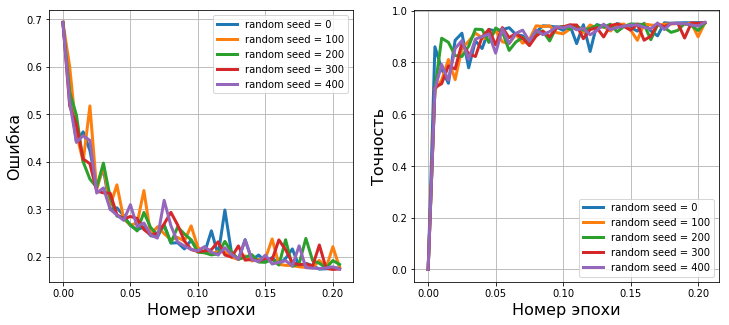

In [182]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

#ax4.set_title('Стохастический градиентный спуск')
for i in range(5):
    ax1.plot(sgd_history[i]['epoch_num'], sgd_history[i]['func'],
             label='random seed = {}'.format(100 * i), linewidth=3)
ax1.set_xlabel('Номер эпохи', fontsize=16)
ax1.set_ylabel('Ошибка', fontsize=16)
ax1.legend()
ax1.grid()

for i in range(5):
    ax2.plot(sgd_history[i]['epoch_num'], sgd_history[i]['accuracy'],
             label='random seed = {}'.format(100 * i), linewidth=3)
ax2.set_xlabel('Номер эпохи', fontsize=16)
ax2.set_ylabel('Точность', fontsize=16)
ax2.legend()
ax2.grid()
plt.savefig('LinearMethodsReport/exp3_1.pdf')

In [180]:
for i in range(5):
    print(sgd_history[i]['accuracy'][-1])

0.953482524516
0.953105355796
0.951093789288
0.953733970329
0.954907384125


In [181]:
for i in range(5):
    print(sgd_history[i]['func'][-1])

0.177011508679
0.177022711242
0.183633008542
0.17410449089
0.17352569447


In [186]:
for i in range(5):
    print(sgd_history[i]['epoch_num'][-1] * X_train.shape[0])

9932.000000001632
9932.000000001632
9932.000000001632
9932.000000001632
9932.000000001632


In [188]:
X_train.shape

(48447, 20958)

### Эксперимент 4

In [215]:
batch_sizes = [1, 5, 10, 20, 50, 100]
sgd_history_old = []
sgd_history_new = []

for batch_size in batch_sizes:
    sgd_clf = optimization.SGDClassifier('binary_logistic', max_iter=10000, l2_coef=1e-5, tolerance=1e-5,
                                         step_alpha=1, step_beta=0, fit_intercept=True, batch_size=batch_size)
    sgd_history_old.append(sgd_clf.fit(X_train, y_train, trace=True, log_freq=0.005,
                                       X_test=X_test, y_test=y_test))
    sgd_clf = optimization.SGDClassifier('binary_logistic', max_iter=10000, l2_coef=1e-5, tolerance=1e-8,
                                         step_alpha=1, step_beta=0, fit_intercept=True, batch_size=batch_size)
    sgd_history_new.append(sgd_clf.fit(X_train, y_train, trace=True, log_freq=0.005,
                                       X_test=X_test, y_test=y_test))

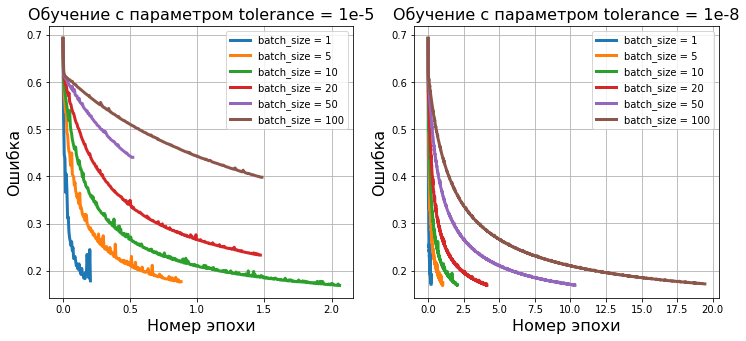

In [221]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.set_title('Обучение с параметром tolerance = 1e-5', fontsize=16)
for i, hist in enumerate(sgd_history_old):
    ax1.plot(hist['epoch_num'], hist['func'],
             label='batch_size = {}'.format(batch_sizes[i]), linewidth=3)
ax1.set_xlabel('Номер эпохи', fontsize=16)
ax1.set_ylabel('Ошибка', fontsize=16)
ax1.legend()
ax1.grid()

ax2.set_title('Обучение с параметром tolerance = 1e-8', fontsize=16)
for i, hist in enumerate(sgd_history_new):
    ax2.plot(hist['epoch_num'], hist['func'],
             label='batch_size = {}'.format(batch_sizes[i]), linewidth=3)
ax2.set_xlabel('Номер эпохи', fontsize=16)
ax2.set_ylabel('Ошибка', fontsize=16)
ax2.legend()
ax2.grid()

plt.savefig('LinearMethodsReport/exp4_1.pdf')

### Эксперимент 5

In [1]:
import numpy as np
from sklearn.datasets import load_svmlight_file
import time
from scipy import special
from scipy import misc
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.datasets import make_blobs

import multiclass
import oracles
import utils
import optimization

In [2]:
def plot_sample(classes):
    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    #Z = Z.reshape(xx.shape)
    plt.figure()
    #plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title('Исходная выборка', fontsize=16)
    #plt.axis('tight')

    # Plot also the training points
    colors = "bry"
    for i, color in zip(classes, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    #for i, color in zip(classes, colors):
    #    plot_hyperplane(i, color)

In [3]:
def plot_logistic_regression(clf, classes, coef, intercept, multi_class):
    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    y_pred = clf.predict(X)
    accuracy = np.mean(y == y_pred)
    plt.title(multi_class + ' (точность = {:.2f})'.format(round(accuracy, 2)), fontsize=16)
    plt.axis('tight')

    # Plot also the training points
    colors = "bry"
    for i, color in zip(classes, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(classes, colors):
        plot_hyperplane(i, color)

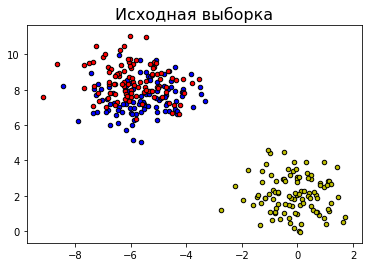

In [79]:
X, y = make_blobs(n_samples=300, random_state=5)
plot_sample(classes=[0, 1, 2])
#plt.savefig('LinearMethodsReport/exp5_1.pdf')
plt.savefig('LinearMethodsReport/exp5_5.pdf')

In [94]:
multinomial = optimization.GDClassifier('multinomial_logistic', max_iter=100000, l2_coef=0, tolerance=1e-8,
                                        step_alpha=1, step_beta=0, fit_intercept=True)
one_vs_all = multiclass.MulticlassStrategy(optimization.GDClassifier, mode='one_vs_all',fit_intercept=True,
                                           max_iter=100000, l2_coef=0, tolerance=1e-8, step_alpha=1, step_beta=0,
                                           loss_function='binary_logistic')
one_vs_one = multiclass.MulticlassStrategy(optimization.GDClassifier, mode='all_vs_all', fit_intercept=True,
                                           max_iter=100000, l2_coef=0, tolerance=1e-8, step_alpha=1, step_beta=0,
                                           loss_function='binary_logistic')

In [95]:
%%time
multinomial_hist = multinomial.fit(X, y, trace=True)

CPU times: user 2min 19s, sys: 28.8 ms, total: 2min 20s
Wall time: 2min 19s


In [96]:
%%time
one_vs_all.fit(X, y)

CPU times: user 55.5 s, sys: 46.7 ms, total: 55.6 s
Wall time: 55.5 s


In [97]:
%%time
one_vs_one.fit(X, y)

CPU times: user 50.8 s, sys: 284 ms, total: 51.1 s
Wall time: 50.7 s


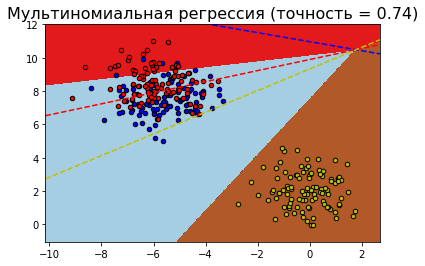

In [98]:
plot_logistic_regression(clf=multinomial, classes=[0, 1, 2],
                         coef=multinomial.w, intercept=multinomial.bias,
                         multi_class='Мультиномиальная регрессия')
#plt.savefig('LinearMethodsReport/exp5_2.pdf')
plt.savefig('LinearMethodsReport/exp5_6.pdf')

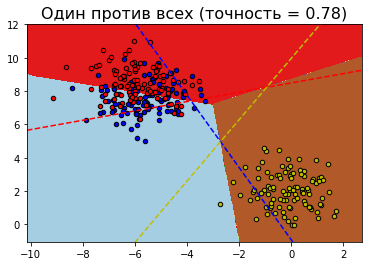

In [99]:
w = np.array([one_vs_all.binary_classifiers[i].w for i in range(3)])
bias = np.array([one_vs_all.binary_classifiers[i].bias for i in range(3)])
plot_logistic_regression(clf=one_vs_all,
                         classes=[0, 1, 2],
                         coef=w,
                         intercept=bias,
                         multi_class='Один против всех')
#plt.savefig('LinearMethodsReport/exp5_3.pdf')
plt.savefig('LinearMethodsReport/exp5_7.pdf')

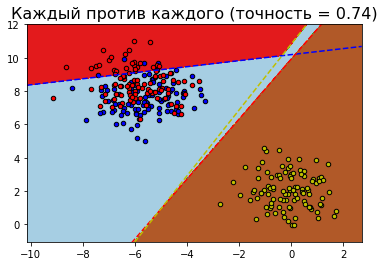

In [100]:
w = np.array([one_vs_one.binary_classifiers[i].w for i in range(3)])
bias = np.array([one_vs_one.binary_classifiers[i].bias for i in range(3)])
plot_logistic_regression(clf=one_vs_one,
                         classes=[0, 1, 2],
                         coef=w,
                         intercept=bias,
                         multi_class='Каждый против каждого')
#plt.savefig('LinearMethodsReport/exp5_4.pdf')
plt.savefig('LinearMethodsReport/exp5_8.pdf')

### Эксперимент 6

In [1]:
from sklearn import datasets, metrics
import numpy as np
from sklearn.datasets import load_svmlight_file
import time
from scipy import special, misc, sparse
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import linear_model
from sklearn.datasets import make_blobs
import re
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import multiclass
import oracles
import utils
import optimization

In [2]:
newsgroups_train = datasets.fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))

In [3]:
texts = []

regex = re.compile('[^a-zA-Z0-9]')
for text in newsgroups_train['data']:
    texts.append(re.sub(regex, ' ', text).lower())

### Эксперимент 7

In [83]:
count_vec = CountVectorizer()
X_train = count_vec.fit_transform(texts)
X_train

<11314x98698 sparse matrix of type '<class 'numpy.int64'>'
	with 1101443 stored elements in Compressed Sparse Row format>

In [84]:
y_train = newsgroups_train.target

### Эксперимент 8

In [6]:
n_splits = 5

In [7]:
def my_cross_val_score(hyperparams, n_splits, cv=None):
    sgd_clf = optimization.SGDClassifier(**hyperparams)
    score = 0.
    sgd_history = []
    if cv is None:
        cv = KFold(n_splits=n_splits, shuffle=True, random_state=42).split(X_train)
    for train_index, test_index in cv:
        sgd_history.append(sgd_clf.fit(X_train[train_index], y_train[train_index], trace=True, log_freq=1e-8))
        y_pred = sgd_clf.predict(X_train[test_index])
        score += np.mean(y_pred == y_train[test_index])
    return score / n_splits, sgd_history

In [8]:
cv = list(KFold(n_splits=n_splits, shuffle=True, random_state=42).split(X_train))

#### подбор параметров

In [9]:
hyperparams = {'step_alpha': 0.5,
               'batch_size': 1000,
               'max_iter': 100,
               'l2_coef': 0,
               'tolerance': 1e-8,
               'fit_intercept': True,
               'loss_function': 'multinomial_logistic'}

In [92]:
sgd_clf = optimization.SGDClassifier(**hyperparams)

In [94]:
score, sgd_history = my_cross_val_score(hyperparams, n_splits, cv)

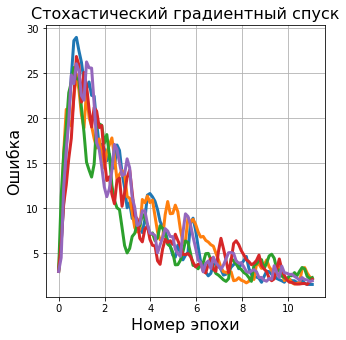

In [95]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.set_title('Стохастический градиентный спуск', fontsize=16)
ax.set_xlabel('Номер эпохи', fontsize=16)
ax.set_ylabel('Ошибка', fontsize=16)
for i in range(n_splits):
    ax.plot(sgd_history[i]['epoch_num'], sgd_history[i]['func'],
            label='w_0 = 0', linewidth=3)
ax.grid()
#ax.legend()

In [96]:
score

0.4991141857264032

#### step_alpha

In [135]:
hyperparams = {'step_alpha': 0.1,
               'batch_size': 8000,
               'max_iter': 500,
               'l2_coef': 0,
               'tolerance': 1e-8,
               'fit_intercept': True,
               'loss_function': 'multinomial_logistic'}

In [120]:
hyperparams['step_alpha'] = 50
func_hist = optimization.SGDClassifier(**hyperparams).fit(X_train, y_train, log_freq=1e-8, trace=True)['func']

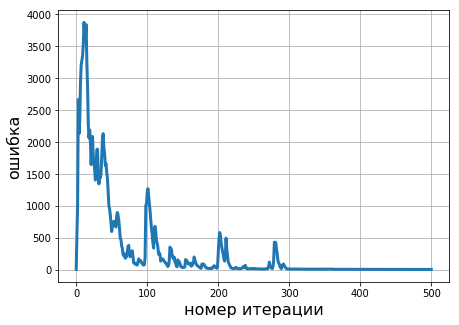

In [121]:
f, ax = plt.subplots(1, 1, figsize=(7, 5))

#ax.set_title('', fontsize=16)
ax.set_xlabel('номер итерации', fontsize=16)
ax.set_ylabel('ошибка', fontsize=16)
ax.plot(np.arange(len(func_hist)), func_hist, linewidth=3)
ax.grid()
#ax.legend()
#plt.savefig('LinearMethodsReport/exp6_1.pdf')

In [122]:
hyperparams['step_alpha'] = 10
func_hist = optimization.SGDClassifier(**hyperparams).fit(X_train, y_train, log_freq=1e-8, trace=True)['func']

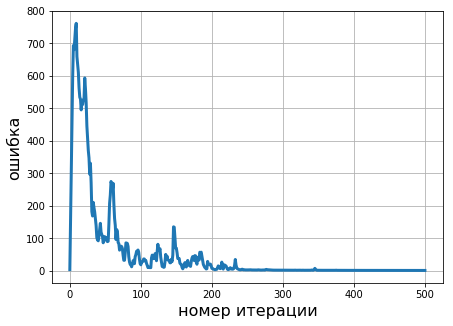

In [123]:
f, ax = plt.subplots(1, 1, figsize=(7, 5))

#ax.set_title('', fontsize=16)
ax.set_xlabel('номер итерации', fontsize=16)
ax.set_ylabel('ошибка', fontsize=16)
ax.plot(np.arange(len(func_hist)), func_hist, linewidth=3)
ax.grid()
#ax.legend()
#plt.savefig('LinearMethodsReport/exp6_1.pdf')

In [136]:
hyperparams['step_alpha'] = 3
func_hist = optimization.SGDClassifier(**hyperparams).fit(X_train, y_train, log_freq=1e-8, trace=True)['func']

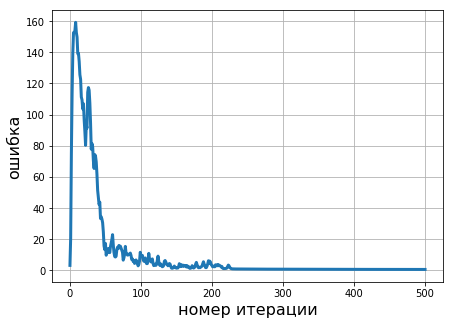

In [137]:
f, ax = plt.subplots(1, 1, figsize=(7, 5))

#ax.set_title('', fontsize=16)
ax.set_xlabel('номер итерации', fontsize=16)
ax.set_ylabel('ошибка', fontsize=16)
ax.plot(np.arange(len(func_hist)), func_hist, linewidth=3)
ax.grid()
#ax.legend()
#plt.savefig('LinearMethodsReport/exp6_1.pdf')

In [138]:
func_hist[-1]

0.38691371561664412

In [140]:
hyperparams['step_alpha'] = 1
func_hist = optimization.SGDClassifier(**hyperparams).fit(X_train, y_train, log_freq=1e-8, trace=True)['func']

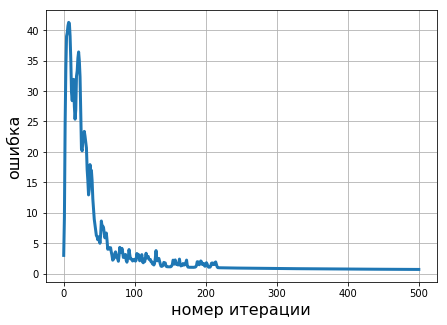

In [141]:
f, ax = plt.subplots(1, 1, figsize=(7, 5))

#ax.set_title('', fontsize=16)
ax.set_xlabel('номер итерации', fontsize=16)
ax.set_ylabel('ошибка', fontsize=16)
ax.plot(np.arange(len(func_hist)), func_hist, linewidth=3)
ax.grid()
#ax.legend()
#plt.savefig('LinearMethodsReport/exp6_1.pdf')

In [142]:
func_hist[-1]

0.68531363664778189

In [144]:
hyperparams['step_alpha'] = 5
func_hist = optimization.SGDClassifier(**hyperparams).fit(X_train, y_train, log_freq=1e-8, trace=True)['func']

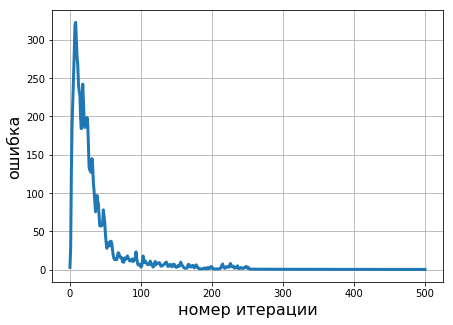

In [145]:
f, ax = plt.subplots(1, 1, figsize=(7, 5))

#ax.set_title('', fontsize=16)
ax.set_xlabel('номер итерации', fontsize=16)
ax.set_ylabel('ошибка', fontsize=16)
ax.plot(np.arange(len(func_hist)), func_hist, linewidth=3)
ax.grid()
#ax.legend()
#plt.savefig('LinearMethodsReport/exp6_1.pdf')

In [146]:
func_hist[-1]

0.30691402450312755

In [147]:
hyperparams['step_alpha'] = 10
func_hist = optimization.SGDClassifier(**hyperparams).fit(X_train, y_train, log_freq=1e-8, trace=True)['func']

In [148]:
func_hist[-1]

0.27458507306121943

In [149]:
hyperparams['step_alpha'] = 20
func_hist = optimization.SGDClassifier(**hyperparams).fit(X_train, y_train, log_freq=1e-8, trace=True)['func']

In [150]:
func_hist[-1]

0.27078841897229733

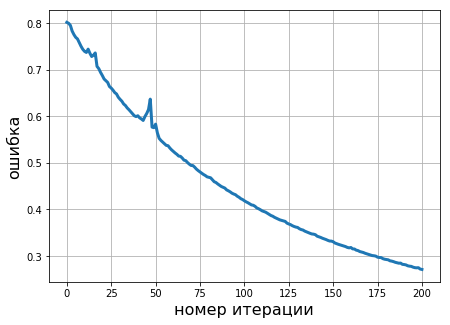

In [153]:
f, ax = plt.subplots(1, 1, figsize=(7, 5))

#ax.set_title('', fontsize=16)
ax.set_xlabel('номер итерации', fontsize=16)
ax.set_ylabel('ошибка', fontsize=16)
ax.plot(np.arange(len(func_hist[300:])), func_hist[300:], linewidth=3)
ax.grid()
#ax.legend()
#plt.savefig('LinearMethodsReport/exp6_1.pdf')

In [154]:
hyperparams['step_alpha'] = 30
func_hist = optimization.SGDClassifier(**hyperparams).fit(X_train, y_train, log_freq=1e-8, trace=True)['func']

In [155]:
func_hist[-1]

0.34455433033260052

In [157]:
hyperparams['step_alpha'] = 25
func_hist = optimization.SGDClassifier(**hyperparams).fit(X_train, y_train, log_freq=1e-8, trace=True)['func']

In [158]:
func_hist[-1]

0.36049381739100933

In [159]:
hyperparams['step_alpha'] = 21
func_hist = optimization.SGDClassifier(**hyperparams).fit(X_train, y_train, log_freq=1e-8, trace=True)['func']

In [160]:
func_hist[-1]

0.30262429881688424

In [163]:
hyperparams['step_alpha'] = 20
func_hist = optimization.SGDClassifier(**hyperparams).fit(X_train, y_train, log_freq=1e-8, trace=True)['func']

In [162]:
func_hist[-1]

0.32384794291523755

In [164]:
func_hist[-1]

0.33544179044771022

In [167]:
hyperparams['step_alpha'] = 15
func_hist = optimization.SGDClassifier(**hyperparams).fit(X_train, y_train, log_freq=1e-8, trace=True)['func']

In [168]:
func_hist[-1]

0.26842248366868421

In [9]:
hyperparams = {'step_alpha': 15,
               'batch_size': 100,
               'max_iter': 1000,
               'l2_coef': 0,
               'tolerance': 1e-8,
               'fit_intercept': True,
               'loss_function': 'multinomial_logistic'}

#### tf-idf

In [10]:
%%time
score, _ = my_cross_val_score(hyperparams, n_splits, cv)

CPU times: user 17min 58s, sys: 613 ms, total: 17min 59s
Wall time: 18min 7s


In [12]:
score

0.61039390057172371

In [89]:
tf_idf = TfidfTransformer()
X_train = tf_idf.fit_transform(X_train)

In [14]:
%%time
score, _ = my_cross_val_score(hyperparams, n_splits)

CPU times: user 15min 23s, sys: 624 ms, total: 15min 24s
Wall time: 15min 24s


In [92]:
score

0.68746564207273975

#### batch\_size

In [9]:
hyperparams = {'step_alpha': 15,
               'batch_size': 8000,
               'max_iter': 1000,
               'l2_coef': 0,
               'tolerance': 1e-8,
               'fit_intercept': True,
               'loss_function': 'multinomial_logistic'}

In [14]:
%%time
func_hist = optimization.SGDClassifier(**hyperparams).fit(X_train, y_train, log_freq=1e-8, trace=True)['func']

CPU times: user 9min 21s, sys: 42.8 ms, total: 9min 21s
Wall time: 9min 21s


In [15]:
func_hist[-1]

0.80272179670876764

In [16]:
%%time
hyperparams['batch_size'] = 1000
func_hist = optimization.SGDClassifier(**hyperparams).fit(X_train, y_train, log_freq=1e-8, trace=True)['func']

CPU times: user 4min 26s, sys: 46.6 ms, total: 4min 26s
Wall time: 4min 27s


In [17]:
func_hist[-1]

0.80252957093399979

In [18]:
%%time
hyperparams['batch_size'] = 100
func_hist = optimization.SGDClassifier(**hyperparams).fit(X_train, y_train, log_freq=1e-8, trace=True)['func']

CPU times: user 3min 44s, sys: 23.2 ms, total: 3min 44s
Wall time: 3min 44s


In [19]:
func_hist[-1]

0.80701340641795238

In [20]:
%%time
hyperparams['batch_size'] = 50
func_hist = optimization.SGDClassifier(**hyperparams).fit(X_train, y_train, log_freq=1e-8, trace=True)['func']

CPU times: user 3min 39s, sys: 1.29 s, total: 3min 41s
Wall time: 4min 2s


In [21]:
func_hist[-1]

0.81253279889314489

In [95]:
hyperparams = {'step_alpha': 15,
               'batch_size': 100,
               'max_iter': 1000,
               'l2_coef': 1e-8,
               'tolerance': 1e-8,
               'fit_intercept': True,
               'loss_function': 'multinomial_logistic'}

In [98]:
%%time
score, _ = my_cross_val_score(hyperparams, n_splits)

CPU times: user 16min 2s, sys: 803 ms, total: 16min 3s
Wall time: 16min 23s


In [104]:
score

0.6850805230648892

In [30]:
hyperparams = {'step_alpha': 50,
               'batch_size': 100,
               'max_iter': 10000,
               'l2_coef': 0,
               'tolerance': 1e-8,
               'fit_intercept': True,
               'loss_function': 'multinomial_logistic'}

### Эксперимент 9

In [85]:
newsgroups_test = datasets.fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

texts = []

regex = re.compile('[^a-zA-Z0-9]')
for text in newsgroups_test['data']:
    texts.append(re.sub(regex, ' ', text).lower())

In [90]:
X_test = tf_idf.transform(count_vec.transform(texts))
y_test = newsgroups_test['target']

In [93]:
%%time
sgd_clf = optimization.SGDClassifier(**hyperparams)
sgd_clf.fit(X_train, y_train)

CPU times: user 15min 44s, sys: 1.61 s, total: 15min 46s
Wall time: 16min 4s


In [94]:
y_pred = sgd_clf.predict(X_test)

In [95]:
metrics.accuracy_score(y_pred, y_test)

0.67472118959107807

In [96]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

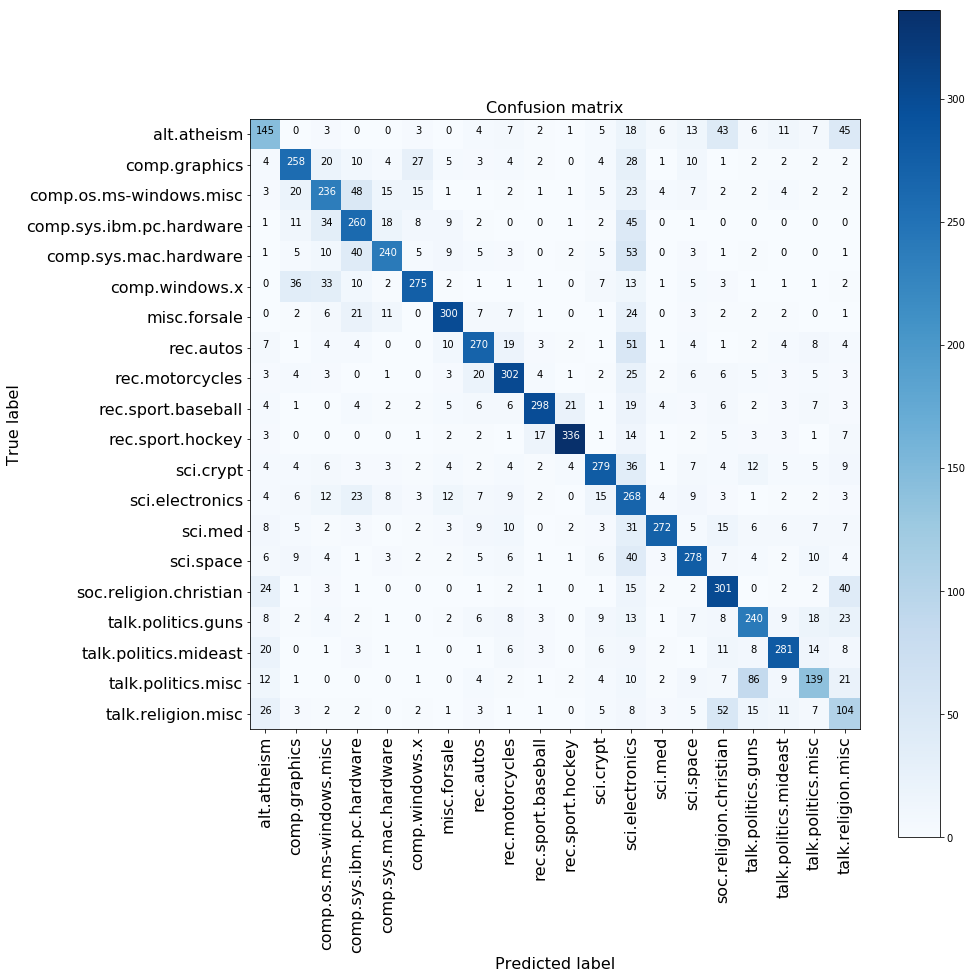

In [97]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=16, rotation=90)
    plt.yticks(tick_marks, classes, fontsize=16)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=16)
    plt.xlabel('Predicted label', fontsize=16)

# Compute confusion matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
f = plt.figure(figsize=(14, 14))
plot_confusion_matrix(cnf_matrix, classes=newsgroups_train['target_names'], title='Confusion matrix')

plt.savefig('LinearMethodsReport/exp6_1.pdf', bbox_inches='tight')

In [116]:
np.arange(y_test.size)[(y_pred == 19) & (y_test == 0)]

array([  95,  585,  973,  982, 1089, 1532, 1584, 1711, 1891, 1917, 2020,
       2213, 2249, 2418, 2501, 2502, 2555, 2597, 2670, 2862, 3170, 3235,
       3241, 3400, 3783, 3917, 3946, 4015, 4243, 4442, 4652, 4776, 4784,
       4871, 4875, 4916, 4997, 5121, 5399, 5412, 5944, 6164, 6263, 6567,
       6874])

In [126]:
texts[4916]

'  give me a call when you build a working model     then we ll talk stock options       private note to jennifer fakult            this post may contain one or more of the following           sarcasm  cycnicism  irony  or humor  please be aware           of this possibility and do not allow yourself to be           confused and or thrown for a loop  if in doubt  assume          all of the above '

In [110]:
np.arange(y_test.size)[(y_pred == 16) & (y_test == 18)]

array([  65,   81,  126,  272,  326,  351,  429,  501,  613,  692,  722,
        808, 1056, 1077, 1174, 1199, 1246, 1320, 1449, 1644, 1681, 1741,
       1811, 1977, 2033, 2118, 2194, 2408, 2565, 2607, 2671, 2918, 2943,
       2949, 3139, 3164, 3250, 3312, 3327, 3579, 3586, 3612, 3642, 3781,
       3790, 3872, 3893, 3947, 4237, 4328, 4426, 4535, 4690, 4768, 4790,
       4874, 4940, 4946, 4947, 4950, 4955, 5140, 5162, 5205, 5514, 5522,
       5534, 5585, 5713, 5880, 6060, 6193, 6226, 6297, 6437, 6632, 6711,
       6848, 6857, 6910, 7000, 7185, 7211, 7218, 7509, 7515])

In [113]:
texts[1199]

'rja mahogany126 cray com  russ anderson  writes         the fact is that koresh and his followers involved themselves  in a gun battle to control the mt carmel complex  that is not  in dispute  from what i remember of the trial  the authories  couldn t reasonably establish who fired first  the big reason  behind the aquittal                                                                                      mitchell s todd                                                                                     mst4298 zeus                                                               tamu edu                                                                                                                                                                                       '

### Эксперимент 10

In [1]:
from nltk import WordNetLemmatizer, SnowballStemmer
from sklearn import datasets, metrics
import numpy as np
from sklearn.datasets import load_svmlight_file
import time
from scipy import special, misc, sparse
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import linear_model
from sklearn.datasets import make_blobs
import re
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import multiclass
import oracles
import utils
import optimization

In [2]:
hyperparams = {'step_alpha': 50,
               'batch_size': 100,
               'max_iter': 10000,
               'l2_coef': 0,
               'tolerance': 1e-8,
               'fit_intercept': True,
               'loss_function': 'multinomial_logistic'}

#### Без преобразований

In [3]:
count_vec = CountVectorizer()
tf_idf = TfidfTransformer()

In [4]:
newsgroups_train = datasets.fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))

texts = []

regex = re.compile('[^a-zA-Z0-9]')
for text in newsgroups_train['data']:
    texts.append(re.sub(regex, ' ', text).lower())

X_train = count_vec.fit_transform(texts)
X_train = tf_idf.fit_transform(X_train)
y_train = newsgroups_train['target']

In [5]:
X_train.shape

(11314, 98698)

In [6]:
newsgroups_test = datasets.fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

texts = []

regex = re.compile('[^a-zA-Z0-9]')
for text in newsgroups_test['data']:
    texts.append(re.sub(regex, ' ', text).lower())

X_test = count_vec.transform(texts)
X_test = tf_idf.transform(X_test)
y_test = newsgroups_test['target']

In [9]:
%%time
sgd_clf = optimization.SGDClassifier(**hyperparams)
sgd_clf.fit(X_train, y_train)

CPU times: user 14min 8s, sys: 70 ms, total: 14min 8s
Wall time: 14min 8s


In [8]:
y_pred = sgd_clf.predict(X_test)
metrics.accuracy_score(y_pred, y_test)

0.67326075411577269

#### Лемматизация

In [27]:
lemmatizer = WordNetLemmatizer()

In [28]:
newsgroups_train = datasets.fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))

texts = []

for text in newsgroups_train['data']:
    text = re.sub(regex, ' ', text).lower()
    new_text = ''
    for token in re.split(' ', text):
        new_text += lemmatizer.lemmatize(token)
        new_text += ' '
    texts.append(new_text)

X_train = count_vec.fit_transform(texts)
X_train = tf_idf.fit_transform(X_train)
y_train = newsgroups_train['target']

In [29]:
X_train.shape

(11314, 92943)

In [30]:
newsgroups_test = datasets.fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

texts = []

regex = re.compile('[^a-zA-Z0-9]')
for text in newsgroups_test['data']:
    text = re.sub(regex, ' ', text).lower()
    new_text = ''
    for token in re.split(' ', text):
        new_text += lemmatizer.lemmatize(token)
        new_text += ' '
    texts.append(new_text)

X_test = count_vec.transform(texts)
X_test = tf_idf.transform(X_test)
y_test = newsgroups_test['target']

In [31]:
%%time
sgd_clf = optimization.SGDClassifier(**hyperparams)
sgd_clf.fit(X_train, y_train)

CPU times: user 13min 20s, sys: 80 ms, total: 13min 20s
Wall time: 13min 20s


In [32]:
y_pred = sgd_clf.predict(X_test)
metrics.accuracy_score(y_pred, y_test)

0.67458842272968667

#### Стемминг

In [33]:
stemmer = SnowballStemmer(language='english')

In [102]:
newsgroups_train = datasets.fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))

texts = []

for text in newsgroups_train['data']:
    text = re.sub(regex, ' ', text).lower()
    new_text = ''
    for token in re.split(' ', text):
        new_text += stemmer.stem(token)
        new_text += ' '
    texts.append(new_text)

X_train = count_vec.fit_transform(texts)
X_train = tf_idf.fit_transform(X_train)
y_train = newsgroups_train['target']

In [103]:
X_train.shape

(11314, 81483)

In [36]:
newsgroups_test = datasets.fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

texts = []

regex = re.compile('[^a-zA-Z0-9]')
for text in newsgroups_test['data']:
    text = re.sub(regex, ' ', text).lower()
    new_text = ''
    for token in re.split(' ', text):
        new_text += lemmatizer.lemmatize(token)
        new_text += ' '
    texts.append(new_text)

X_test = count_vec.transform(texts)
X_test = tf_idf.transform(X_test)
y_test = newsgroups_test['target']

In [37]:
%%time
sgd_clf = optimization.SGDClassifier(**hyperparams)
sgd_clf.fit(X_train, y_train)

CPU times: user 11min 19s, sys: 70 ms, total: 11min 19s
Wall time: 11min 19s


In [38]:
y_pred = sgd_clf.predict(X_test)
metrics.accuracy_score(y_pred, y_test)

0.62387148167817308

### Эксперимент 11

In [84]:
import pandas as pd

In [106]:
def fetch_train():
    newsgroups_train = datasets.fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))

    texts = []

    regex = re.compile('[^a-zA-Z0-9]')
    for text in newsgroups_train['data']:
        texts.append(re.sub(regex, ' ', text).lower())

    X_train = count_vec.fit_transform(texts)
    y_train = newsgroups_train['target']
    return X_train, y_train

In [107]:
def fetch_test():
    newsgroups_test = datasets.fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

    texts = []

    regex = re.compile('[^a-zA-Z0-9]')
    for text in newsgroups_test['data']:
        texts.append(re.sub(regex, ' ', text).lower())

    X_test = count_vec.transform(texts)
    y_test = newsgroups_test['target']
    return X_test, y_test

In [109]:
X_train, y_train = fetch_train()
X_test, y_test = fetch_test()

token_counts = np.asarray(X_train.sum(axis=0))[0]

low_threshold = 0
high_threshold = 100

X_train = tf_idf.fit_transform(X_train[:, (token_counts > low_threshold) & (token_counts < high_threshold)])
X_test = tf_idf.transform(X_test[:, (token_counts > low_threshold) & (token_counts < high_threshold)])

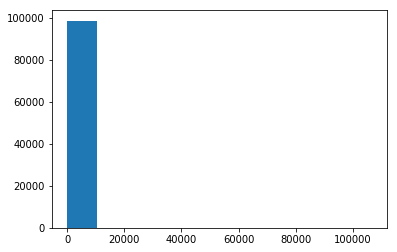

In [110]:
plt.hist(token_counts)
pass

0.975602342499


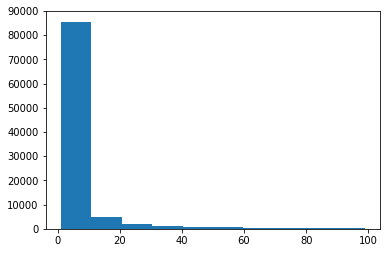

In [100]:
high_threshold = 100
low_threshold = 0
plt.hist(token_counts[(token_counts > low_threshold) & (token_counts < high_threshold)])
print(np.mean((token_counts > low_threshold) & (token_counts < high_threshold)))

In [111]:
%%time
sgd_clf = optimization.SGDClassifier(**hyperparams)
sgd_clf.fit(X_train, y_train)

CPU times: user 12min 59s, sys: 96.6 ms, total: 12min 59s
Wall time: 12min 59s


In [112]:
y_pred = sgd_clf.predict(X_test)
metrics.accuracy_score(y_pred, y_test)

0.60674455655868298

0.858072098725


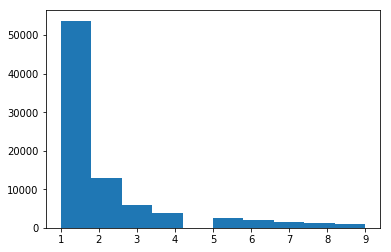

In [94]:
high_threshold = 10
low_threshold = 0
plt.hist(token_counts[(token_counts > low_threshold) & (token_counts < high_threshold)])
print(np.mean((token_counts > low_threshold) & (token_counts < high_threshold)))

In [125]:
X_train, y_train = fetch_train()
X_test, y_test = fetch_test()

token_counts = np.asarray(X_train.sum(axis=0))[0]

low_threshold = 0
high_threshold = 10

X_train = tf_idf.fit_transform(X_train[:, (token_counts > low_threshold) & (token_counts < high_threshold)])
X_test = tf_idf.transform(X_test[:, (token_counts > low_threshold) & (token_counts < high_threshold)])

In [126]:
%%time
sgd_clf = optimization.SGDClassifier(**hyperparams)
sgd_clf.fit(X_train, y_train)

CPU times: user 11min, sys: 63.2 ms, total: 11min
Wall time: 11min


In [127]:
y_pred = sgd_clf.predict(X_test)
metrics.accuracy_score(y_pred, y_test)

0.38621879978757301

In [119]:
X_train, y_train = fetch_train()
X_test, y_test = fetch_test()

token_counts = np.asarray(X_train.sum(axis=0))[0]

low_threshold = 1
high_threshold = 1000000

X_train = tf_idf.fit_transform(X_train[:, (token_counts > low_threshold) & (token_counts < high_threshold)])
X_test = tf_idf.transform(X_test[:, (token_counts > low_threshold) & (token_counts < high_threshold)])

In [120]:
%%time
sgd_clf = optimization.SGDClassifier(**hyperparams)
sgd_clf.fit(X_train, y_train)

CPU times: user 6min 50s, sys: 50 ms, total: 6min 50s
Wall time: 6min 50s


In [121]:
y_pred = sgd_clf.predict(X_test)
metrics.accuracy_score(y_pred, y_test)

0.66821561338289959

0.455622201058


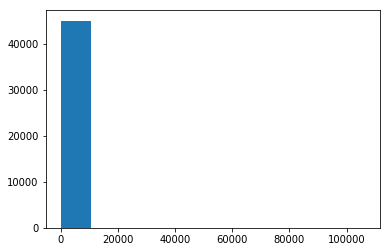

In [122]:
high_threshold = 1000000
low_threshold = 1
plt.hist(token_counts[(token_counts > low_threshold) & (token_counts < high_threshold)])
print(np.mean((token_counts > low_threshold) & (token_counts < high_threshold)))

In [131]:
from nltk.corpus import stopwords

In [141]:
stop = set(stopwords.words('english'))
len(stop)

153

In [142]:
newsgroups_train = datasets.fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))

texts = []

for text in newsgroups_train['data']:
    text = re.sub(regex, ' ', text).lower()
    new_text = ''
    for token in re.split(' ', text):
        if token not in stop or lemmatizer.lemmatize(token) not in stop:
            new_text += token
            new_text += ' '
    texts.append(new_text)

X_train = count_vec.fit_transform(texts)
X_train = tf_idf.fit_transform(X_train)
y_train = newsgroups_train['target']

In [143]:
newsgroups_test = datasets.fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

texts = []

regex = re.compile('[^a-zA-Z0-9]')
for text in newsgroups_test['data']:
    text = re.sub(regex, ' ', text).lower()
    texts.append(text)

X_test = count_vec.transform(texts)
X_test = tf_idf.transform(X_test)
y_test = newsgroups_test['target']

In [144]:
X_train.shape

(11314, 98557)

In [162]:
%%time
sgd_clf = optimization.SGDClassifier(**hyperparams)
sgd_clf.fit(X_train, y_train)

CPU times: user 13min 23s, sys: 83.3 ms, total: 13min 23s
Wall time: 13min 23s


In [157]:
y_pred = sgd_clf.predict(X_test)
metrics.accuracy_score(y_pred, y_test)

0.6903876792352629